import requests
import json
import prettytable
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['SAS0800002000011','SUUR0000SA0'],"startyear":"2006", "endyear":"2019"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
for series in json_data['Results']['series']:
    x=prettytable.PrettyTable(["series id","year","period","value","footnotes"])
    seriesId = series['seriesID']
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
        footnotes=""
        for footnote in item['footnotes']:
            if footnote:
                footnotes = footnotes + footnote['text'] + ','
        if 'M01' <= period <= 'M12':
            x.add_row([seriesId,year,period,value,footnotes[0:-1]])
    output = open(seriesId + '.txt','w')
    output.write (x.get_string())
    output.close()

In [1]:
import matplotlib.pyplot as plt

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
import pandas as pd
base_url = "https://api.census.gov/data/2016/cbp"
naics_codes=["61----","71----","72----","54----"]
codes_dict = {"61----":"Education","71----":"Entertainment","72----":"Hospitality","54----":"Coding_Tech"}

In [3]:
#what if I try to filter by isin before I group
#for 2016

areas= [42660,38900,41940,41700,40900,12420]
data_2016 = pd.read_csv("D:/project_1_cpb/cbp16msa.txt", header = 0)
data_df_2016 = pd.DataFrame(data_2016)
new_data_df_2016 = pd.DataFrame({"Area":data_df_2016["msa"],"Industry":data_df_2016["naics"],"Annual payroll":data_df_2016["ap"],
                           "Establishments":data_df_2016["est"]})

dataIwant_2016 = new_data_df_2016.loc[new_data_df_2016["Industry"].isin(naics_codes)]

dataIwant1_2016= dataIwant_2016.loc[dataIwant_2016["Area"].isin(areas)]

dataIwant_grouped_2016= dataIwant1_2016.groupby(dataIwant1_2016["Area"]).agg({"Annual payroll":"mean","Establishments":"mean"})
dataIwant_combined_2016 = pd.merge(dataIwant_grouped_2016,dataIwant1_2016, on = "Area",how="outer")
dataIwant_cut_2016 = dataIwant_combined_2016.drop(columns = {"Annual payroll_x","Establishments_x"})

dataIwant_cut_2016 = dataIwant_cut_2016.set_index("Area")

dataIwant_renamed_2016=dataIwant_cut_2016.rename(columns={"Annual payroll_y":"Annual Payroll","Establishments_y":"#_Businesses"},
                         index= {42660:"Seattle",38900:"Portland",41940:"San Jose",41700:"San Antonio",
                                40900:"Sacramento",12420:"Austin"})

dataIwant_renamed_2016["Job_Type"] = dataIwant_renamed_2016["Industry"].map(codes_dict)
dataIwant_renamed_2016 = dataIwant_renamed_2016.drop(columns = {"Industry"})
dataIwant_renamed_2016

,Annual Payroll,#_Businesses,Job_Type
Area,,,
Austin,9848185,8805,Coding_Tech
Austin,628044,942,Education
Austin,413954,945,Entertainment
Austin,2140605,4536,Hospitality
Portland,5916735,8665,Coding_Tech
Portland,824726,1094,Education
Portland,485572,1078,Entertainment
Portland,2041158,6309,Hospitality
Sacramento,3974895,6133,Coding_Tech


In [4]:
#For 2015
data_2015 = pd.read_csv("D:/project_1_cpb/cbp15msa.txt", header = 0)

data_df_2015 = pd.DataFrame(data_2015)
new_data_df_2015 = pd.DataFrame({"Area":data_df_2015["MSA"],"Industry":data_df_2015["NAICS"],"Annual payroll":data_df_2015["AP"],
                           "Establishments":data_df_2015["EST"]})

dataIwant_2015 = new_data_df_2015.loc[new_data_df_2015["Industry"].isin(naics_codes)]

dataIwant1_2015= dataIwant_2015.loc[dataIwant_2015["Area"].isin(areas)]

dataIwant_grouped_2015= dataIwant1_2015.groupby(dataIwant1_2015["Area"]).agg({"Annual payroll":"mean","Establishments":"mean"})
dataIwant_combined_2015 = pd.merge(dataIwant_grouped_2015,dataIwant1_2015, on = "Area",how="outer")
dataIwant_cut_2015 = dataIwant_combined_2015.drop(columns = {"Annual payroll_x","Establishments_x"})

dataIwant_cut_2015 = dataIwant_cut_2015.set_index("Area")

dataIwant_renamed_2015=dataIwant_cut_2015.rename(columns={"Annual payroll_y":"Annual Payroll","Establishments_y":"#_Businesses"},
                         index= {42660:"Seattle",38900:"Portland",41940:"San Jose",41700:"San Antonio",
                                40900:"Sacramento",12420:"Austin"})

dataIwant_renamed_2015["Job_Type"] = dataIwant_renamed_2015["Industry"].map(codes_dict)
dataIwant_renamed_2015 = dataIwant_renamed_2015.drop(columns = {"Industry"})
dataIwant_renamed_2015

,Annual Payroll,#_Businesses,Job_Type
Area,,,
Austin,7959042,8433,Coding_Tech
Austin,588019,902,Education
Austin,345923,881,Entertainment
Austin,1970329,4405,Hospitality
Portland,5897921,8423,Coding_Tech
Portland,802786,1067,Education
Portland,447411,1054,Entertainment
Portland,1920465,6070,Hospitality
Sacramento,4616966,6084,Coding_Tech


In [5]:
#For 2014
data_2014 = pd.read_csv("D:/project_1_cpb/cbp14msa.txt", header = 0)

data_df_2014 = pd.DataFrame(data_2014)
new_data_df_2014 = pd.DataFrame({"Area":data_df_2014["msa"],"Industry":data_df_2014["naics"],"Annual payroll":data_df_2014["ap"],
                           "Establishments":data_df_2014["est"]})

dataIwant_2014 = new_data_df_2014.loc[new_data_df_2014["Industry"].isin(naics_codes)]

dataIwant1_2014= dataIwant_2014.loc[dataIwant_2014["Area"].isin(areas)]

dataIwant_grouped_2014= dataIwant1_2014.groupby(dataIwant1_2014["Area"]).agg({"Annual payroll":"mean","Establishments":"mean"})
dataIwant_combined_2014 = pd.merge(dataIwant_grouped_2014,dataIwant1_2014, on = "Area",how="outer")
dataIwant_cut_2014 = dataIwant_combined_2014.drop(columns = {"Annual payroll_x","Establishments_x"})

dataIwant_cut_2014 = dataIwant_cut_2014.set_index("Area")

dataIwant_renamed_2014=dataIwant_cut_2014.rename(columns={"Annual payroll_y":"Annual Payroll","Establishments_y":"#_Businesses"},
                         index= {42660:"Seattle",38900:"Portland",41940:"San Jose",41700:"San Antonio",
                                40900:"Sacramento",12420:"Austin"})

dataIwant_renamed_2014["Job_Type"] = dataIwant_renamed_2014["Industry"].map(codes_dict)
dataIwant_renamed_2014 = dataIwant_renamed_2014.drop(columns = {"Industry"})
dataIwant_renamed_2014

,Annual Payroll,#_Businesses,Job_Type
Area,,,
Austin,6963470,7984,Coding_Tech
Austin,530563,846,Education
Austin,333165,802,Entertainment
Austin,1756848,4216,Hospitality
Portland,5189142,8267,Coding_Tech
Portland,771491,1021,Education
Portland,428235,1018,Entertainment
Portland,1733612,5952,Hospitality
Sacramento,3931156,6080,Coding_Tech


In [6]:
#For 2013
data_2013 = pd.read_csv("D:/project_1_cpb/cbp13msa.txt", header = 0)

data_df_2013 = pd.DataFrame(data_2013)
new_data_df_2013 = pd.DataFrame({"Area":data_df_2013["msa"],"Industry":data_df_2013["naics"],"Annual payroll":data_df_2013["ap"],
                           "Establishments":data_df_2013["est"]})
dataIwant_2013 = new_data_df_2013.loc[new_data_df_2013["Industry"].isin(naics_codes)]

dataIwant1_2013= dataIwant_2013.loc[dataIwant_2013["Area"].isin(areas)]

dataIwant_grouped_2013= dataIwant1_2013.groupby(dataIwant1_2013["Area"]).agg({"Annual payroll":"mean","Establishments":"mean"})
dataIwant_combined_2013 = pd.merge(dataIwant_grouped_2013,dataIwant1_2013, on = "Area",how="outer")
dataIwant_cut_2013 = dataIwant_combined_2013.drop(columns = {"Annual payroll_x","Establishments_x"})

dataIwant_cut_2013 = dataIwant_cut_2013.set_index("Area")

dataIwant_renamed_2013=dataIwant_cut_2013.rename(columns={"Annual payroll_y":"Annual Payroll","Establishments_y":"#_Businesses"},
                         index= {42660:"Seattle",38900:"Portland",41940:"San Jose",41700:"San Antonio",
                                40900:"Sacramento",12420:"Austin"})

dataIwant_renamed_2013["Job_Type"] = dataIwant_renamed_2013["Industry"].map(codes_dict)
dataIwant_renamed_2013 = dataIwant_renamed_2013.drop(columns = {"Industry"})

In [7]:
#new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])
merge13_14 = pd.merge(dataIwant_renamed_2013,dataIwant_renamed_2014, on=["Area","Job_Type"],suffixes=("_2013","_2014")) 
                      #left_on=["Area","Industry"],right_on=["Annual Payroll","#_Businesses"], suffixes=("_2013","_2014"))
merge15_16 =  pd.merge(dataIwant_renamed_2015,dataIwant_renamed_2016, on=["Area","Job_Type"],suffixes=("_2015","_2016"))
merge_all = pd.merge(merge13_14,merge15_16,on=["Area","Job_Type"])
merge_all

,Annual Payroll_2013,#_Businesses_2013,Job_Type,Annual Payroll_2014,#_Businesses_2014,Annual Payroll_2015,#_Businesses_2015,Annual Payroll_2016,#_Businesses_2016
Area,,,,,,,,,
Austin,6403975,7591,Coding_Tech,6963470,7984,7959042,8433,9848185,8805
Austin,511357,819,Education,530563,846,588019,902,628044,942
Austin,272066,757,Entertainment,333165,802,345923,881,413954,945
Austin,1579296,4153,Hospitality,1756848,4216,1970329,4405,2140605,4536
Portland,5056031,8154,Coding_Tech,5189142,8267,5897921,8423,5916735,8665
Portland,717795,1007,Education,771491,1021,802786,1067,824726,1094
Portland,407990,984,Entertainment,428235,1018,447411,1054,485572,1078
Portland,1593852,5857,Hospitality,1733612,5952,1920465,6070,2041158,6309
Sacramento,3878912,5942,Coding_Tech,3931156,6080,4616966,6084,3974895,6133


In [8]:
payroll = merge_all.drop(columns = {"#_Businesses_2013","#_Businesses_2014","#_Businesses_2015","#_Businesses_2016"})
payroll=payroll[["Job_Type","Annual Payroll_2013","Annual Payroll_2014","Annual Payroll_2015","Annual Payroll_2016"]]
payroll

,Job_Type,Annual Payroll_2013,Annual Payroll_2014,Annual Payroll_2015,Annual Payroll_2016
Area,,,,,
Austin,Coding_Tech,6403975,6963470,7959042,9848185
Austin,Education,511357,530563,588019,628044
Austin,Entertainment,272066,333165,345923,413954
Austin,Hospitality,1579296,1756848,1970329,2140605
Portland,Coding_Tech,5056031,5189142,5897921,5916735
Portland,Education,717795,771491,802786,824726
Portland,Entertainment,407990,428235,447411,485572
Portland,Hospitality,1593852,1733612,1920465,2041158
Sacramento,Coding_Tech,3878912,3931156,4616966,3974895


In [19]:
businesses = merge_all.drop(columns = {"Annual Payroll_2013","Annual Payroll_2014","Annual Payroll_2015","Annual Payroll_2016"})
businesses=businesses[["Job_Type","#_Businesses_2013","#_Businesses_2014","#_Businesses_2015","#_Businesses_2016"]]
businesses

,Job_Type,#_Businesses_2013,#_Businesses_2014,#_Businesses_2015,#_Businesses_2016
Area,,,,,
Austin,Coding_Tech,7591,7984,8433,8805
Austin,Education,819,846,902,942
Austin,Entertainment,757,802,881,945
Austin,Hospitality,4153,4216,4405,4536
Portland,Coding_Tech,8154,8267,8423,8665
Portland,Education,1007,1021,1067,1094
Portland,Entertainment,984,1018,1054,1078
Portland,Hospitality,5857,5952,6070,6309
Sacramento,Coding_Tech,5942,6080,6084,6133


In [34]:
education = payroll[payroll["Job_Type"]=="Education"]
education_T = education.T
education_T= education_T.drop(index="Job_Type")
education_T

Area,Austin,Portland,Sacramento,San Antonio,San Jose,Seattle
Annual Payroll_2013,511357,717795,421765,604552,2601438,1023063
Annual Payroll_2014,530563,771491,437911,616203,2742969,1096264
Annual Payroll_2015,588019,802786,457903,657913,2979171,1096415
Annual Payroll_2016,628044,824726,466287,691970,3288186,1108623


Text(0.5, 1.0, 'School Payrolls')

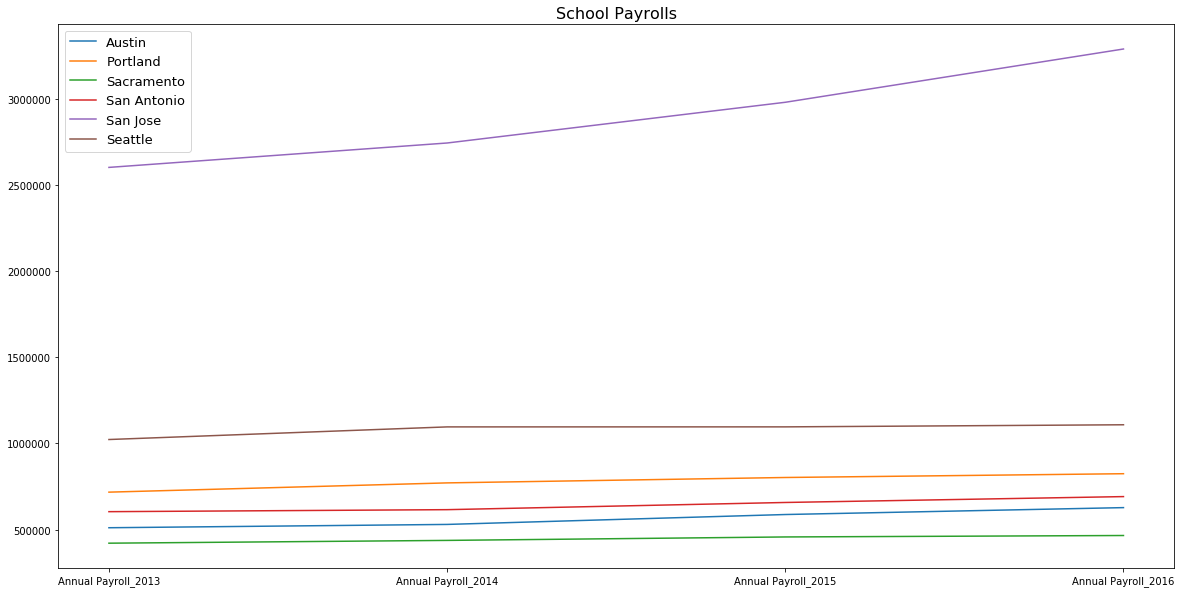

In [55]:
plt.figure(figsize=(20,10))
for city in education_T:
        plt.plot(education_T[city],label = city)
plt.legend(loc='upper left',fontsize = 13)
plt.title("School Payrolls",fontsize = 16)

C:\Users\chris\Anaconda3\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "mid left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


Text(0.5, 1.0, '# of Restaurants')

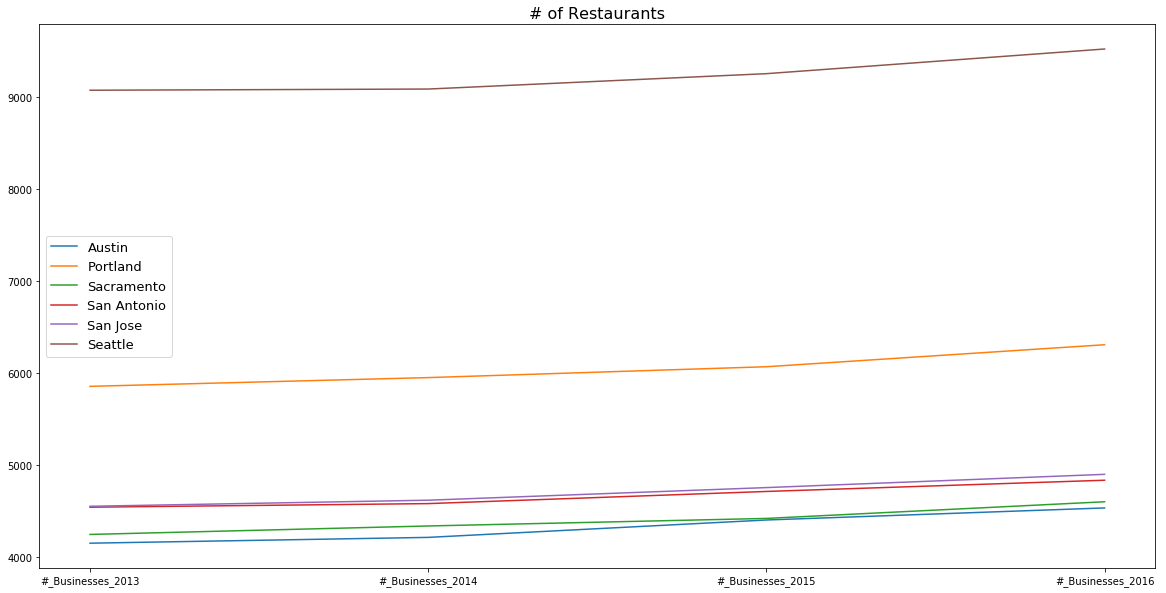

In [58]:
restaurant_nums = businesses[businesses["Job_Type"]=="Hospitality"]
restaurant_nums_T = restaurant_nums.T
restaurant_nums_T= restaurant_nums_T.drop(index="Job_Type")

plt.figure(figsize=(20,10))
for city in restaurant_nums_T:
        plt.plot(restaurant_nums_T[city],label = city)
plt.legend(loc='mid left',fontsize = 13)
plt.title("# of Restaurants",fontsize = 16)

Text(0.5, 1.0, '# of movies/theaters')

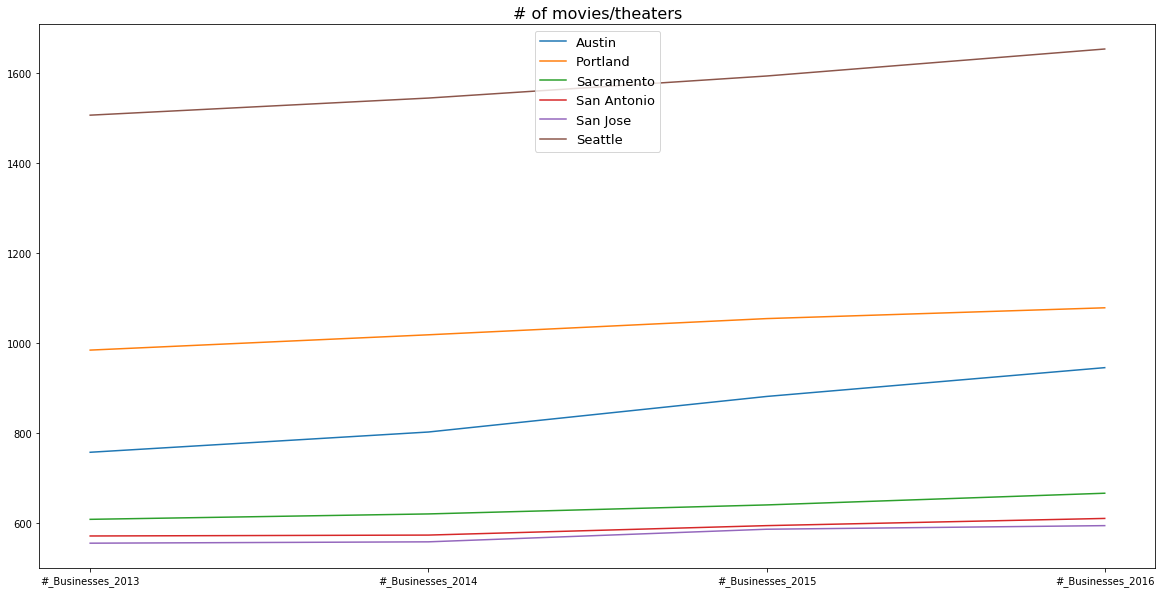

In [62]:
entertain_nums = businesses[businesses["Job_Type"]=="Entertainment"]
entertain_nums_T = entertain_nums.T
entertain_nums_T= entertain_nums_T.drop(index="Job_Type")

plt.figure(figsize=(20,10))
for city in entertain_nums_T:
        plt.plot(entertain_nums_T[city],label = city)
plt.legend(loc='mid left',fontsize = 13)
plt.title("# of movies/theaters",fontsize = 16)

Text(0.5, 1.0, 'Tech Company Payroll')

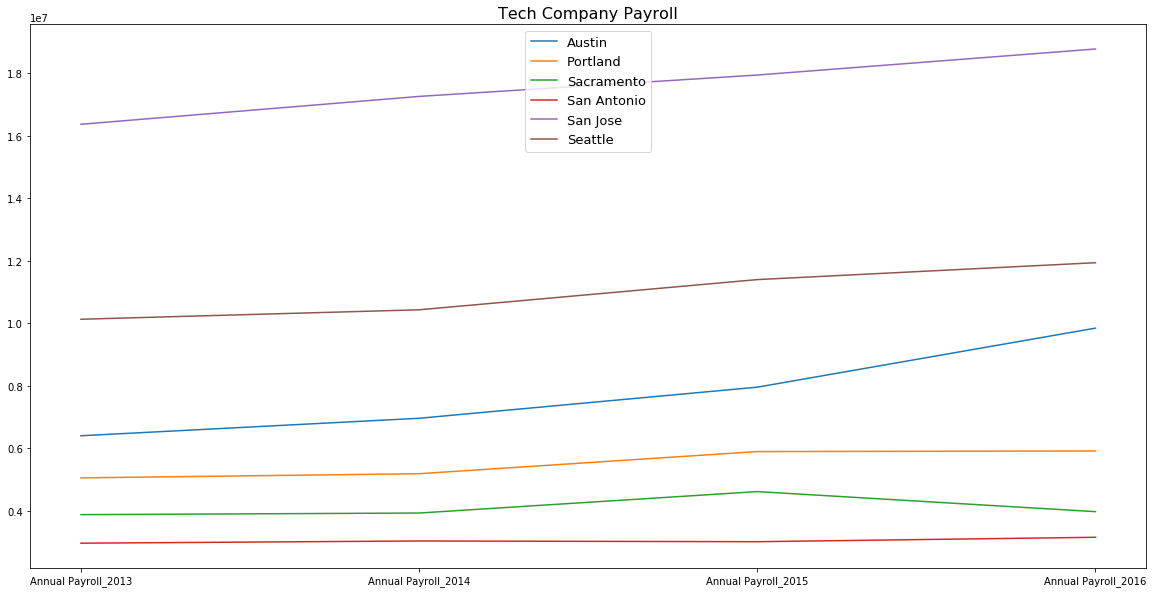

In [61]:
coding_nums = payroll[payroll["Job_Type"]=="Coding_Tech"]
coding_nums_T = coding_nums.T
coding_nums_T= coding_nums_T.drop(index="Job_Type")

plt.figure(figsize=(20,10))
for city in coding_nums_T:
        plt.plot(coding_nums_T[city],label = city)
plt.legend(loc='mid left',fontsize = 13)
plt.title("Tech Company Payroll",fontsize = 16)